# SWMAL Exercise

## Regulizers

### Resume of The Linear Regressor

For our  data set $\mathbf{X}$ and target $\mathbf{y}$ 

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\scriptsize\textrm{test}}}
    \def\powtrain{\pown{\scriptsize\textrm{train}}}
    \def\pred{\st{pred}}
    \def\bM{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bm{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
\bX =
    \ac{cccc}{
        x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
        x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
        \vdots      &             &        & \vdots \\
        x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
    }
, ~~~~~~~~
\by =
    \ac{c}{
         y\pown{1} \\
         y\pown{2} \\
         \vdots \\
         y\pown{n} \\
    }
%, ~~~~~~~~
%\bx\powni = 
%    \ac{c}{
%        1\\
%        x_1\powni \\
%        x_2\powni \\ 
%        \vdots \\
%        x_d\powni
%     }  
$$

a __linear regressor__ model, with the $d$-dimensional (expressed here without the bias term, $w_0$) weight column vector,

$$
\bw =
    \ac{c}{
         w_1 \\
         w_2 \\
         \vdots \\
         w_d \\
    }
$$


was previously found to be of the form

$$
    y\powni\pred =  \bw^\top \bx\powni
$$

for a single data instance, or for the full data set in a compact matrix notation 

$$
    \by\pred = \bX \bw
$$

(and rememering to add the bias term $w_0$ on $\bw$ and correspondingly adding fixed '1'-column in the $\bX$ matrix, later.) 

An accociated cost function could be the MSE 

$$
\ar{rl}{
    \textrm{MSE}(\bX,\by;\bw) &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                            &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni\pred \right)^2\\
                            &\propto ||\bX \bw - \by\pred||_2^2
}
$$                   

here using the squared Euclidean norm, $\norm{2}^2$, via the $||\cdot||_2^2$ expressions. We used the MSE to express the total cost function, $J$, as

$$
   \textrm{MSE} \propto J = ||\bX \bw - \by\pred||_2^2
$$

give or take a few constants, like $1/2$ or $1/n$.

### Adding Regularization to the Linear Regressor

Now the weights, $\bw$ (previously also known as $\btheta$), in this model are free to take on any value they like, and this can  lead to both numerical problems and overfitting, if the algorithm decides to drive the weights to insane, humongous values, say $10^{200}$ or similar.

Also for some models, neural networks in particular, having weights outside the range -1 to 1 (or 0 to 1) may cause complete saturation of some of the internal non-linear components (the activation function). 

Now, enters the ___regularization___ of the model: keep the weights at a sane level while doing the numerical gradient descent (GD) in the search space. This can quite simply be done by adding a ___penalty___ part, $\Omega$, to the $J$ function as

$$
    \ar{rl}{
        \tilde{J} &= J + \alpha \Omega(\bw)\\
                  &= \frac{1}{n} ||\bX \bw - \by||_2^2 + \alpha ||\bw||^2_2
     }
$$

So, the algorithm now has to find an optimal value (minimum of $J$) for both the usual MSE part and for the added penalty scaled with the $\alpha$ constant.

### Regularization and Optimization for Neural Networks (NNs)

The regularization method mentioned here is strictly for a linear regression model, but such a model constitutes a major part of the neurons (or perceptrons), used in neural networks. 

### Qa The Penalty Factor

Now, lets examine  what $||\bw||^2_2$ effectively mean? It is composed of our well-known $\norm{2}^2$ norm and can also be expressed as simple as

$$
  ||\bw||^2_2 = \bw^\top\bw
$$

Construct a penaltiy function that implements $\bw^\top\bw$, re-using any functions from `numpy` (implementation could be a tiny _one-liner_).

Take $w_0$ into account, this weight factor should NOT be included in the norm. Also checkup on `numpy`s `dot` implementation, if you have not done so already: it is a typical pythonic _combo_ function, doing both dot op's (inner product) and matrix multiplication (outer product) dependent on the shape of the input parameters.

Then run it on the three test vectors below, and explain when the penalty factor is low and when it is high.

In [1]:
# Qa..first define some numeric helper functions for the test-vectors..

import numpy as np
import collections

def isFloat(x):
    # is there a python single/double float??
    return isinstance(x, float) or isinstance(x, np.float32) or isinstance(x, np.float64)
    # NOT defined on Windows?:   or isinstance(x, np.float128)      

# Checks that a 'float' is 'sane' (original from libitmal)
def CheckFloat(x, checkrange=False, xmin=1E-200, xmax=1E200, verbose=0):
    if verbose>1:
        print(f"CheckFloat({x}, type={type(x)}")
    if isinstance(x, collections.Iterable):
        for i in x:
            CheckFloat(i, checkrange=checkrange, xmin=xmin, xmax=xmax, verbose=verbose)
    else:
        #if (isinstance(x,int)):
        #    print("you gave me an integer, that was ignored")
        #    return
        assert isFloat(x), f"x={x} is not a float/float64/numpy.float32/64/128, but a {type(x)}"
        assert np.isnan(x)==False , "x is NAN"
        assert np.isinf(x)==False , "x is inf"
        assert np.isinf(-x)==False, "x is -inf"
        # NOTE: missing test for denormalized float
        if checkrange:
            z=fabs(x)
            assert z>=xmin, f"abs(x)={z} is smaller that expected min value={xmin}"
            assert z<=xmax, f"abs(x)={z} is larger that expected max value={xmax}"
        if verbose>0:
             print(f"CheckFloat({x}, type={x} => OK")

# Checks that two 'floats' are 'close' (original from libitmal)
def CheckInRange(x, expected, eps=1E-9, autoconverttofloat=True, verbose=0):
    assert eps>=0, "eps is less than zero"
    if autoconverttofloat and (not isFloat(x) or not isFloat(expected) or not isFloat(eps)):
        if verbose>1:
            print(f"notice: autoconverting x={x} to float..")
        return CheckInRange(1.0*x, 1.0*expected, 1.0*eps, False, verbose)
    CheckFloat(x)
    CheckFloat(expected)
    CheckFloat(eps)
    x0 = expected - eps
    x1 = expected + eps
    ok = x>=x0 and x<=x1
    absdiff = np.fabs(x-expected)
    if verbose > 0:
        print(f"CheckInRange(x={x}, expected={expected}, eps={eps}: x in [{x0}; {x1}] => {ok}")
    assert ok, f"x={x} is not within the range [{x0}; {x1}] for eps={eps}, got eps={absdiff}"

print("OK(setup..)")

OK(setup..)


In [26]:
# TODO: code
    
def Omega(w):
    #assert False, "TODO: implement Omega() here and remove this assert.."

    # Don't take the bias into account
    return np.linalg.norm(w[1:])**2
 
# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'    
w_a = np.array([1., 2., -3.])  
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13

CheckInRange(p_a, e0)
CheckInRange(p_b, e1)
CheckInRange(p_c, e2)

print("OK")

P(w0)=12.999999999999998
P(w1)=9e+20
P(w2)=0.13000000000000003
OK


## Adding Regularization for Linear Regression Models

Adding the penalty $\alpha ||\bw||^2_2$ actually corresponds to the Scikit-learn model `sklearn.linear_model.Ridge` and there are, as usual, a bewildering array of regulized models to choose from in Scikit-learn with exotic names like `Lasso` and `Lars`

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Let us just examine `Ridge`, `Lasso` and `ElasticNet` here.

### Qb Explain the Ridge Plot

First take a peek into the plots (and code) below, that fits the `Ridge`, `Lasso` and `ElasticNet` to a polynomial model. The plots show three fits with different $\alpha$ values (0, 10$^{-5}$, and 1).

First, explain what the different $\alpha$ does to the actual fitting for the `Ridge` model in the plot.

#### Explanation
The $\alpha$ in the `Ridge` model is a constant that multiplies the objective function: 

$$||y - Xw||^2_2 + \alpha \cdot ||w||^2_2$$

in an attempt to minimize it. In the case of $\alpha = 0$, it looks as if there's a lot of overfitting, since the model being used in linear. The same with $\alpha = 1e-5$, a bit less overfitting, but still significant. With $\alpha = 1$, however, the fit looks to be underfitted, since $J$ actually getz penalized by the entire $||w||_2^2$ value. To determine whether or not $\alpha = 1$ indeed is a good fit, one would have to check the model score.

With $\alpha = 0$, the fitting is the same as the regular least squares method, sine the penalty term simply becomes 0. The SKLearn actually advises not to use the Ridge function with $\alpha = 0$, for "Numerical reasons". Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html.

c:\Users\mkeri\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
c:\Users\mkeri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.744242739346298, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(
c:\Users\mkeri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7739590093335087, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


OK(plot)


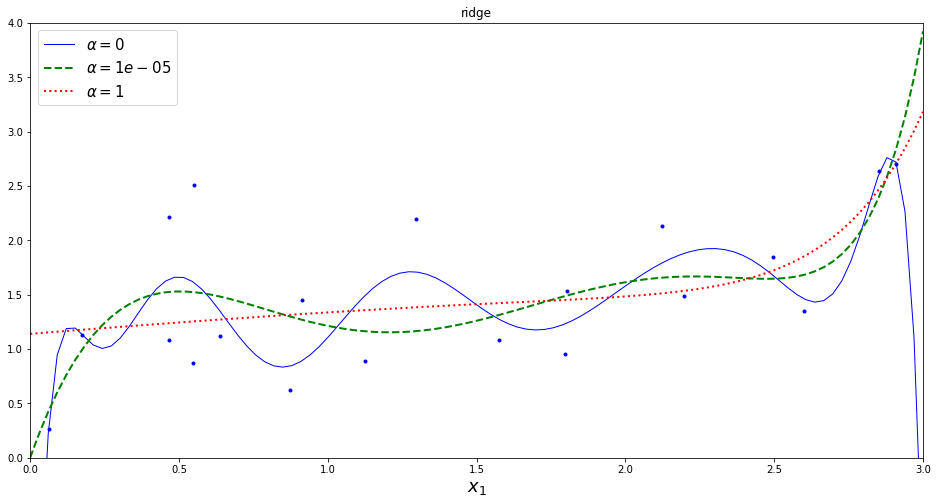

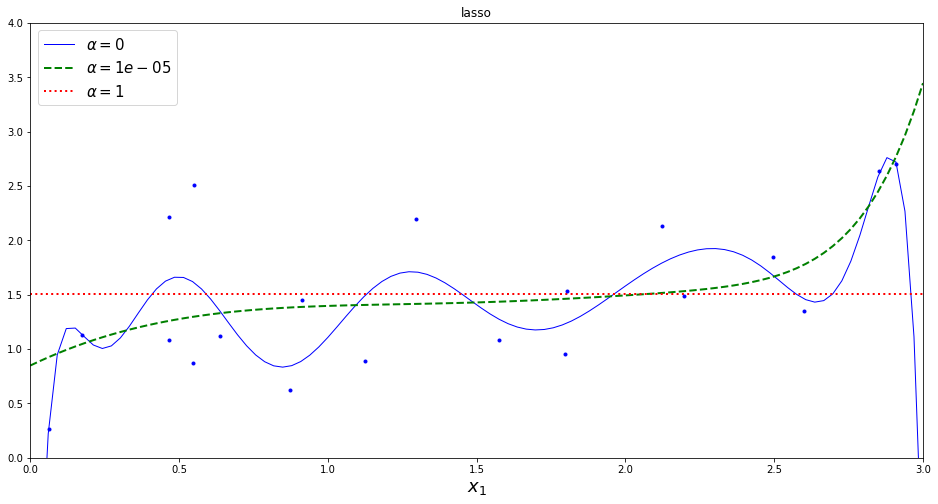

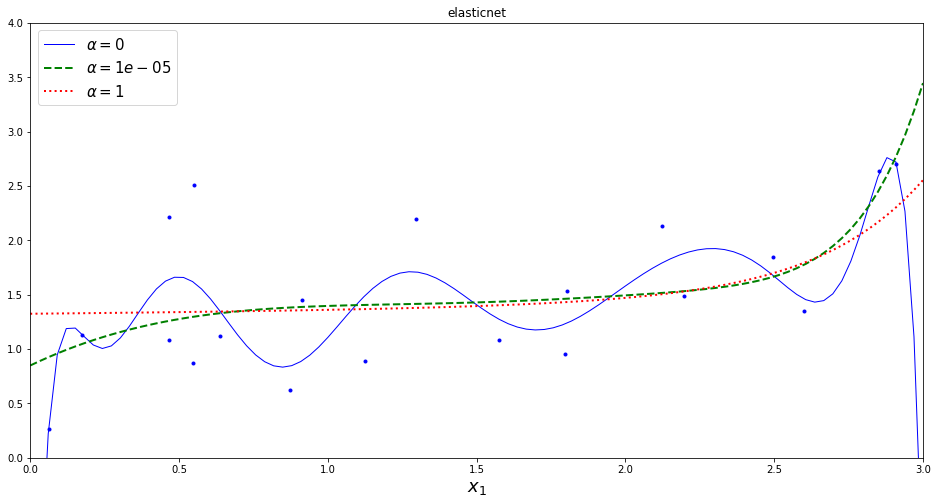

In [27]:
# TODO: Qb, just run the code..

%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(16,8))
    
    alphas=(0, 10**-5, 1) 
    random_state=42
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y
    
X, X_new, y = GenerateData()

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

print("OK(plot)")

### Qc Explain the Ridge, Lasso and ElasticNet Regularization Methods

Then explain the different regularization methods used for the `Ridge`, `Lasso` and `ElasticNet` models, by looking at the math formulas for the methods in the Scikit-learn documentation and/or using [HOML].


#### Explanation

First, looking at the formulas, from the Scikit-learn documentation:

Ridge:

$$
||y - Xw||^2_2 + \alpha \cdot ||w||^2_2
$$

Lasso:

$$
(1 / (2 \cdot n_{samples})) \cdot ||y - Xw||^2_2 + \alpha \cdot ||w||_1
$$

ElasticNet:

$$
1 / (2  n_{samples}) \cdot ||y - Xw||^2_2
+ alpha \cdot l1_{ratio} \cdot ||w||_1
+ 0.5 \cdot \alpha \cdot (1 - l1_{ratio}) \cdot ||w||^2_2
$$





It is quite apparant that the main difference are as follows:

(note: coefficients = weights)

Ridge uses the L2 norm, and no constant depending on the number of samples

Lasso uses the L1 norm, and is dependant on the number of samples

Elasticnet is also dependant on the number of samples, while using both the L2 and L1 norms. Furthermore, it specifies a(n) $L1_{ratio}$, that gives the norm L2 and L1 their own form of weight. It is also clear, that if one sets the $L1_{ratio} = 1$, one would get the Lasso regulizer.

The $\alpha$ value in Ridge controls how much the coefficients "shrink", with a larger $\alpha$ shrinking the coeffients closer to zero. With a larger $\alpha$, the model becomes better at handling collinearity, since the coefficients become smaller and smaller.

Lasso estimates "sparse coefficients", which are coefficients that are non-zero, which is useful since that reduces the number of features on which a solution is dependant. In other words, it "prefers" solutions with fewer non-zero coefficients, meaning that under some circumstances, it will be able to return the exact values of the coefficients on which the model is dependant.

Being dependant on both L2 and L1, ElasticNet allows for a combination-ish of Lasso and Rigde, since it will then include some of the sparse, non-zero coefficients, while also maintaining the regularization properties of Ridge (second term in the formula).


In [ ]:
# TODO:(in text..)
#assert False, "Explain the math of Ridge, Lasso and ElasticNet.."

### Qd Regularization and Overfitting

Finally, comment on how regularization may be used to reduce a potential tendency to overfit the data

Describe the situation with the ___tug-of-war___ between the MSE ($J$) and regulizer ($\Omega$) terms in $\tilde{J}$ 

$$
  \tilde{J} = J + \alpha \Omega(\bw)\\
$$
and the potential problem of $\bw^*$ being far, far away from the origin, and say for a fixed $\alpha=1$ in regulizer term (normally for real data $\alpha \ll 1$).


<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/weights_regularization_l2.png" alt="WARNING: could not get image from server." style="width:240px">

[OPTIONAL]: Would data preprocessing in the form of scaling, standardization or normalization be of any help to that particular situation? If so, describe.

Regularization is useful in regards to reducing a models tendency to overfit, since the model gets penalized by some value, making it impossible for the model to fit too closely to the data. If theres no penalty, the model wont be able to generalize for unseen data, resulting in overfitting.

the tug-of-war is kind of a balancing act between the MSE and the regularization $\Omega$. The MSE aims to minimize the error between what the model predicts, and what the actual target values are, pushing for a better fit of the training data. The regularization term $\Omega$ "wants" to keep the model parameters small, putting shackles on the model, preventing it from overfitting (and reduces its complexity).

When $\alpha = 1$ the regularization is much stronger, which can be beneficial for small training sets, since fewer data points means less certainty (large data good, small data bad, ish). But, as we saw in the Ridge model in Qa, with $\alpha = 1$, the model doesnt really capture any behaviour in the middle section of the data, making it underfitted. Therefore its important to tune the $\alpha$ value carefully.

Optional answer:
Scaling would be of help, since scaling the data down to some range, eg. [-1:1], typically helps the model converge quicker, preventing the regularization term from being dominated by larger scales, eg [-1e5:1e5].
By standardizing the data, $\mu = 0$ and $\sigma = 1$, the data becomes more comparable, and as with scaling, prevents the regularization term from being dominated by larger values.
By normalizing the data, each data-point would contribute equally to the regularization term, meaning no outliers (eg. faulty data) would contribute more heavily when the model converges.

### Qe Regularization Methods for Neural Networks

What kinds of regularizations are used for neural network models?

Explain the NN-regularizations by giving a shorter textual (or perhaps also a mathematical) explanation of the regularization method.

Setup a NN model with one or more of the NN-regularization method you found, showing that the generalization error drops if a particular regularization method is applied.

Use some data of your own choice for the demonstration, and also design and setup our own particular NN instantiation (you choose layout and all the other NN-hyperparameters) using either the `sklearn` or `Keras` framework.

In [ ]:
# TODO: (in text and code..)
Assert False, "Regularization Methods for Neural Networks.."

REVISIONS||
:-|:-
2018-03-01| CEF, initial.
2018-03-06| CEF, updated.
2018-03-07| CEF, split Qb into Qb+c+d and added NN comment.
2018-03-11| CEF, updated Qa and $w_0$ issues.
2018-03-11| CEF, updated Qd with plot and Q.
2018-03-11| CEF, clarified $w_0$ issue and update $\tilde{J}$'s.
2019-10-15| CEF, updated for ITMAL E19.
2019-10-19| CEF, updated text, added float-check functions.
2020-03-23| CEF, updated to ITMAL F20.
2020-10-20| CEF, updated to ITMAL E20.
2020-10-27| CEF, minor updates.
2020-10-28| CEF, made preprocessing optional part of Qq (tug-of-war).
2020-03-17| CEF, updated to ITMAL F21.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-31| CEF, updated to SWMAL F22.
2023-03-24| CEF, updated to SWMAL F23, added Qe.
2023-09-19| CEF, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.